## Notebook to start making projections over the twenty first century


This notebook is used to make projections of the wind influence on sea level rise in the 21th century. 

Here, the same methods are used as in: DOI 10.1007/s00382-013-1932-4 (A new atmospheric proxy for sea level variability
in the southeastern North Sea: observations and future ensemble projections)


From the regression between zos and vas/uas (cmip6 data) the regression coefficients are used to make predictions into the 21st century (files: nearby_wind_regression_cmip6, timmerman_regression_cmip6, dangendorf_regression_cmip6). Only models are used that perform well according to spectral analysis (file: comparison). 




In [64]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Projections/code')

import import_data as imprt
import projections as proj
import figures as fig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Projections for only the best models

In [65]:
# Import best models
path_best_models = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Comparison results/'
models = []

# Source: https://stackabuse.com/reading-and-writing-lists-to-a-file-in-python/
# open file and read the content in a list
with open(path_best_models+'bestmodels.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        models.append(currentPlace)

#### Import zos data

In [66]:
# Open data file
zos_119 = imprt.import_cmip6_slh_data(data_type = 'ssp119')
zos_126 = imprt.import_cmip6_slh_data(data_type = 'ssp126')
zos_245 = imprt.import_cmip6_slh_data(data_type = 'ssp245')
zos_370 = imprt.import_cmip6_slh_data(data_type = 'ssp370')
zos_585 = imprt.import_cmip6_slh_data(data_type = 'ssp585')
zos_hist = imprt.import_cmip6_slh_data(data_type = 'historical')

# Select models
zos_119 = zos_119.where(zos_119.model.isin(models), drop = True).dropna(dim = 'time')
zos_126 = zos_126.where(zos_126.model.isin(models), drop = True).dropna(dim = 'time')
zos_245 = zos_245.where(zos_245.model.isin(models), drop = True).dropna(dim = 'time')
zos_370 = zos_370.where(zos_370.model.isin(models), drop = True).dropna(dim = 'time')
zos_585 = zos_585.where(zos_585.model.isin(models), drop = True).dropna(dim = 'time')
zos_hist = zos_hist.where(zos_hist.model.isin(models), drop = True).dropna(dim = 'time')

#### Plot zos data

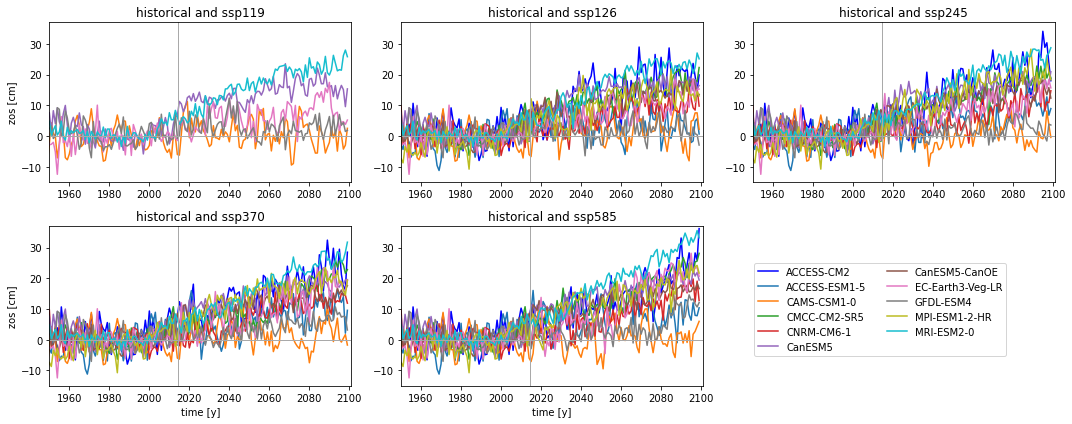

In [67]:
scenarios_zos = [zos_119, zos_126, zos_245, zos_370, zos_585]
labels = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

fig.plot_zos_per_scenario(scenarios_zos, labels, zos_hist, hist_start = 1950)

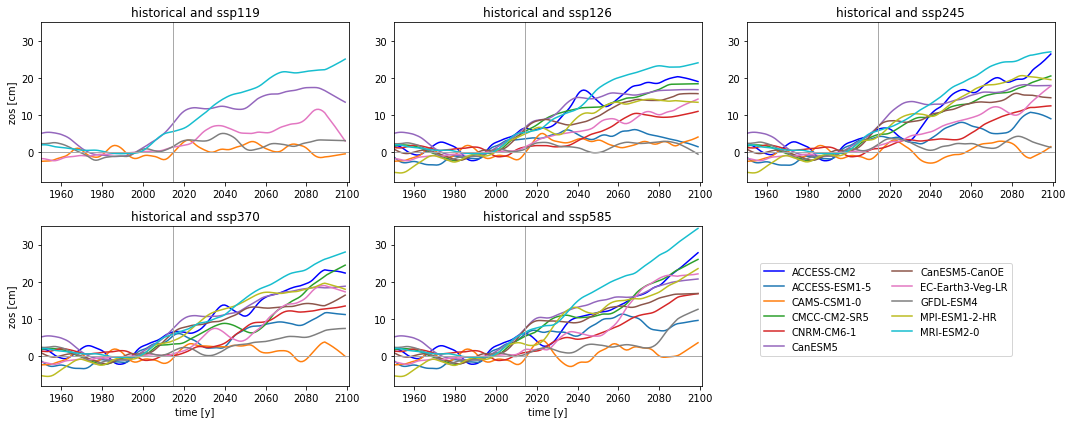

In [68]:
fig.plot_zos_per_scenario(scenarios_zos, labels, zos_hist, hist_start = 1950, smoothed = True)

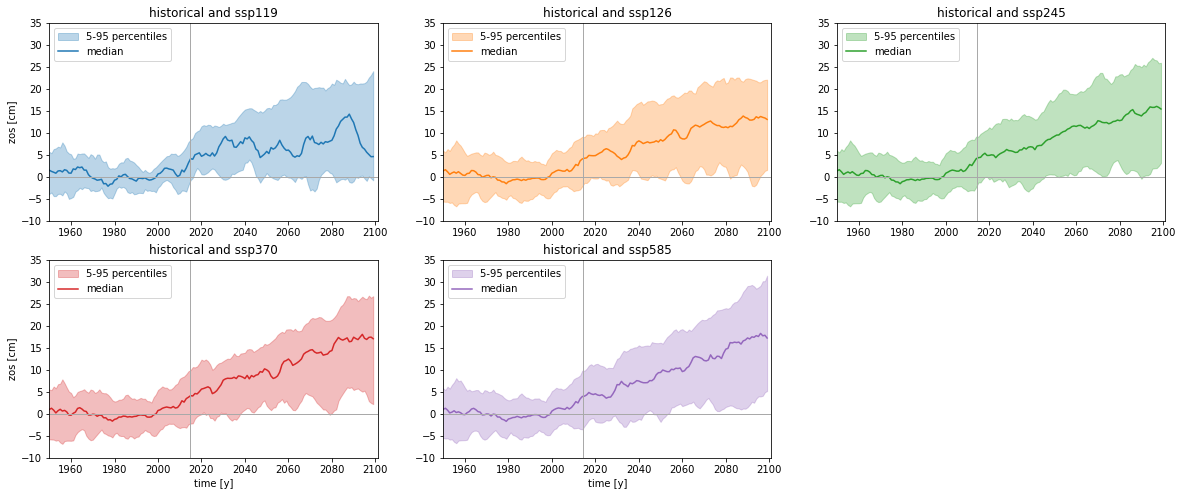

In [69]:
fig.plot_zos_med_percentiles_per_scenarios(scenarios_zos, labels, zos_hist, ra=5, hist_start = 1950)

## NearestPoint wind regression model

MSL = constant + coef_u2 x u2 + coef_v2 x v2


What do we need to obtain projections?
- cmip6 data for scenario
- regression results over historical period (from the regression of sea level averaged over all stations)
- whether these regression results are significant

In [70]:
model = 'NearestPoint'

#### Import historical wind contribution to sea level rise

In [71]:
# Open data file
wind_contr_hist_np = imprt.import_cmip6_wind_contribution_data()

# Select models
wind_contr_hist_np = wind_contr_hist_np.where(wind_contr_hist_np.model.isin(models), drop = True)

# Create dataframe
wind_contr_hist_np = wind_contr_hist_np.wind_total.to_pandas().T

# Import historical wind contribution from pre_projection_regression
wind_contr_hist_pp_np = imprt.import_cmip6_wind_contribution_data_preproj()[wind_contr_hist_np.columns]

#### Import wind data

In [72]:
# Open data file
wind_119 = imprt.import_cmip6_wind_data(data_type = 'ssp119')
wind_126 = imprt.import_cmip6_wind_data(data_type = 'ssp126')
wind_245 = imprt.import_cmip6_wind_data(data_type = 'ssp245')
wind_370 = imprt.import_cmip6_wind_data(data_type = 'ssp370')
wind_585 = imprt.import_cmip6_wind_data(data_type = 'ssp585')
wind_hist = imprt.import_cmip6_wind_data(data_type = 'historical')

# Select models
wind_119_np = wind_119.where(wind_119.model.isin(models), drop = True).dropna(dim = 'time')
wind_126_np = wind_126.where(wind_126.model.isin(models), drop = True).dropna(dim = 'time')
wind_245_np = wind_245.where(wind_245.model.isin(models), drop = True).dropna(dim = 'time')
wind_370_np = wind_370.where(wind_370.model.isin(models), drop = True).dropna(dim = 'time')
wind_585_np = wind_585.where(wind_585.model.isin(models), drop = True).dropna(dim = 'time')
wind_hist_np = wind_hist.where(wind_hist.model.isin(models), drop = True).dropna(dim = 'time')

#### Plot wind data

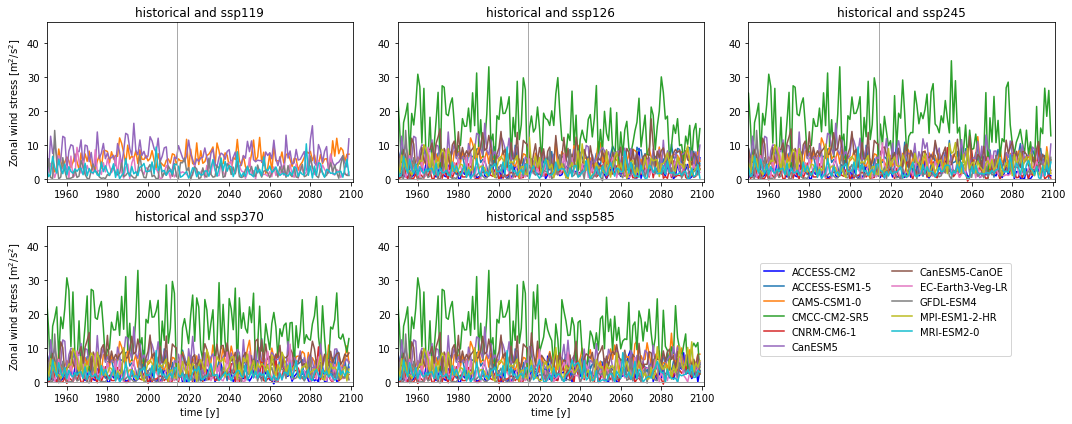

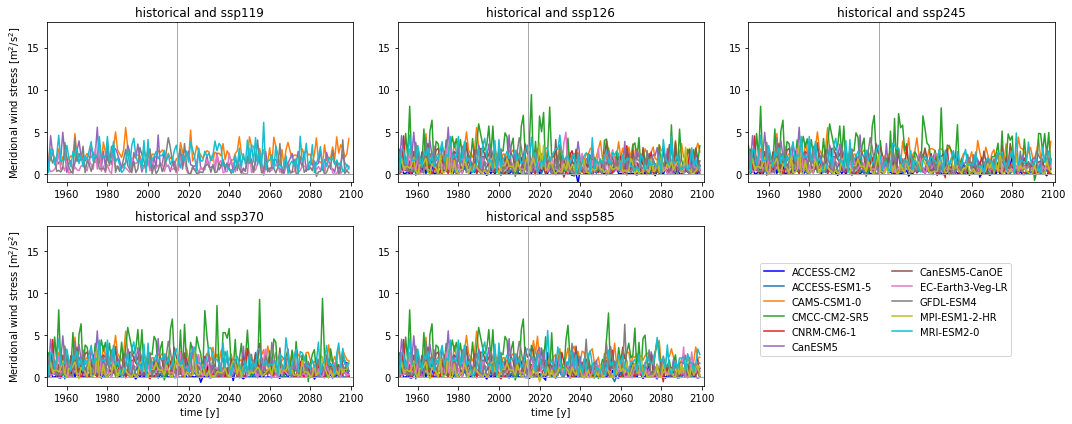

In [73]:
wind_scenarios_np = [wind_119_np, wind_126_np, wind_245_np, wind_370_np, wind_585_np]

fig.plot_wind_per_scenario(wind_scenarios_np, labels, wind_hist_np, hist_start = 1950)

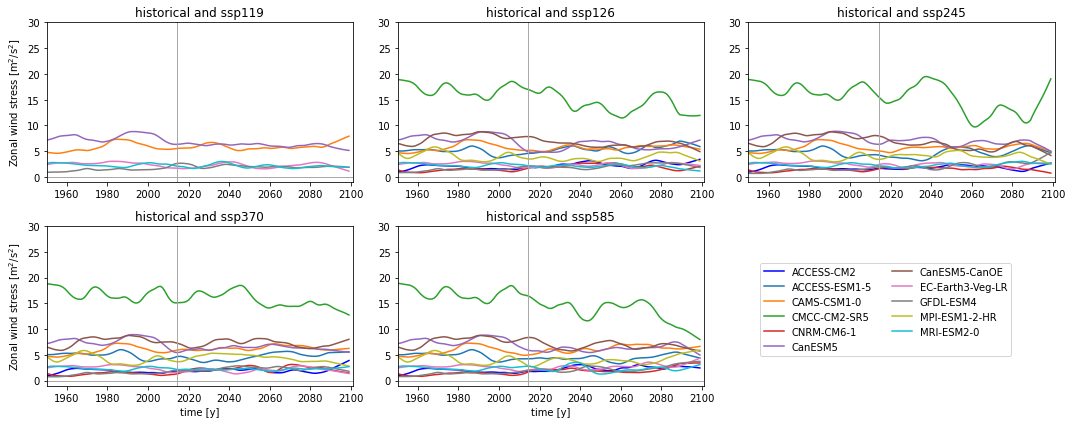

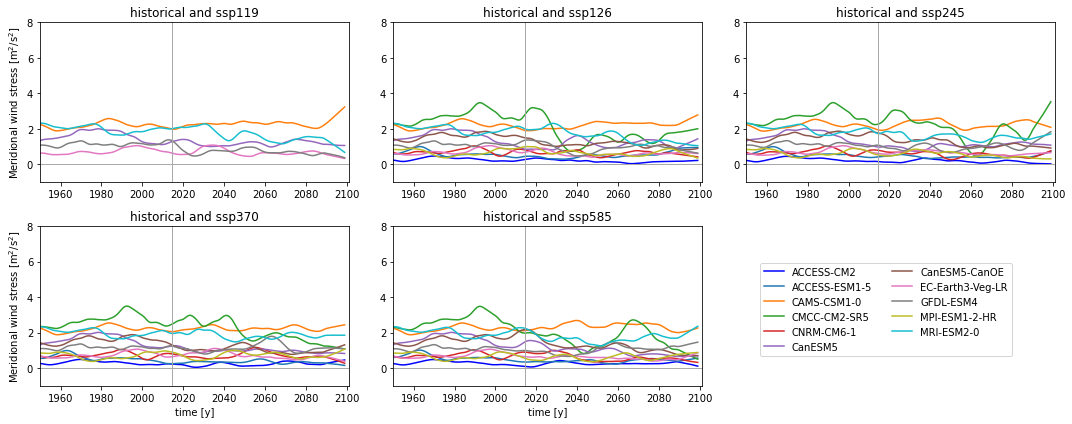

In [74]:
fig.plot_wind_per_scenario(wind_scenarios_np, labels, wind_hist_np, hist_start = 1950, smoothed = True)

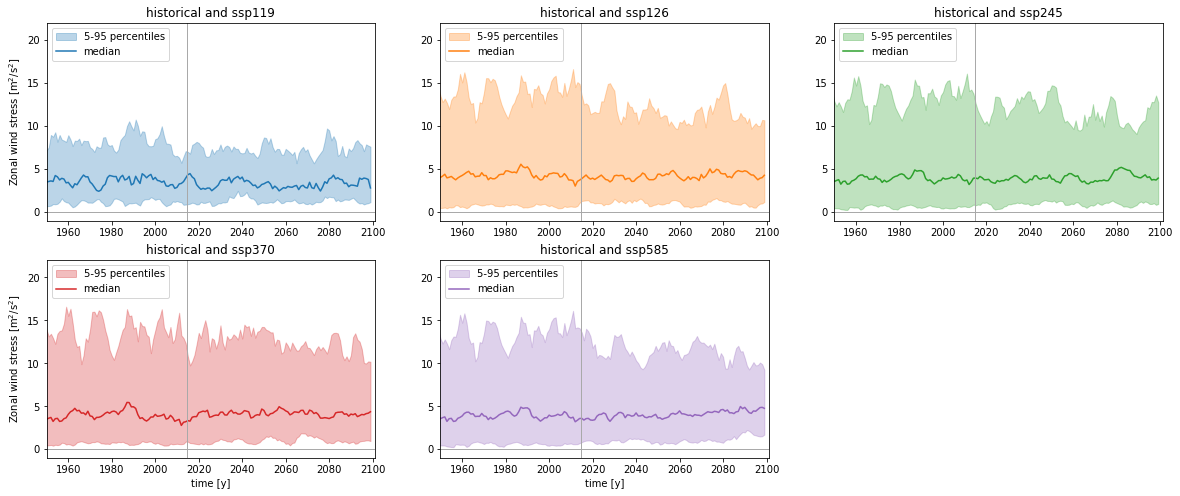

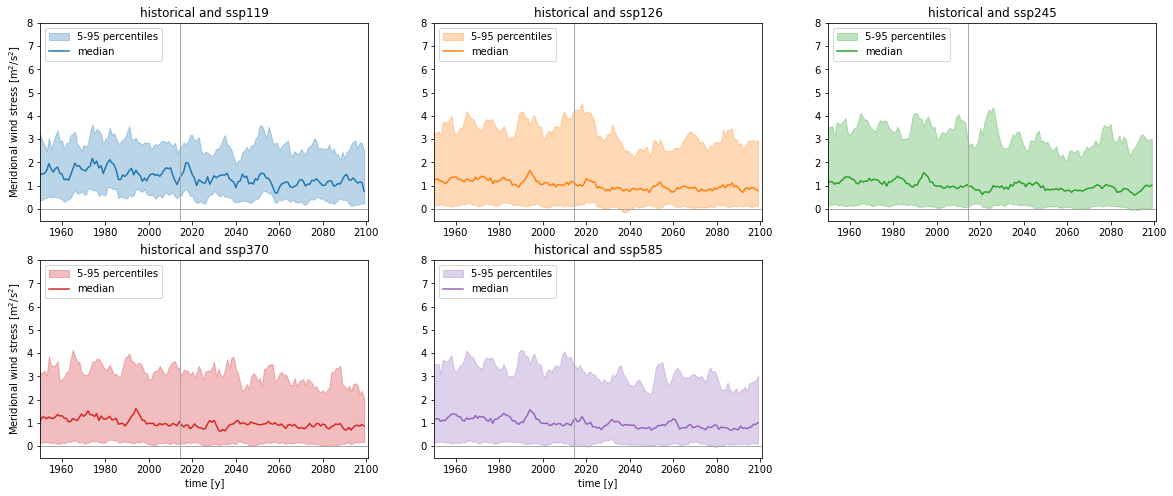

In [75]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_np, labels, wind_hist_np, ra=5, hist_start = 1950)

#### Import regression coefficients

In [76]:
import pandas as pd

# Import regression coefficients
path_reg_results = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Regression results/Projections/'
results_np = pd.read_csv(path_reg_results + f'{model}_results.csv', index_col = 'result')

# Select models
results_np = results_np[models]

In [77]:
results_np

ACCESS-CM2  ACCESS-ESM1-5   CAMS-CSM1-0  CMCC-CM2-SR5  \
result                                                                 
R$^2$        2.863687e-01   1.364836e-01  1.562155e-01  2.676465e-01   
R$^2_{u^2}$  2.000424e-01   7.440374e-02  1.556887e-01  2.299422e-01   
R$^2_{v^2}$  2.240777e-02   2.427300e-02  2.022982e-02  6.317912e-02   
rmse         3.422289e+00   4.135781e+00  3.793555e+00  2.725769e+00   
constant     1.417280e-17  -4.536560e-17 -3.387079e-16  6.795194e-18   
u$^2$        2.175452e+00   1.562468e+00  1.614587e+00  1.459558e+00   
v$^2$       -1.239325e+00  -1.161072e+00  5.103800e-02  5.571622e-01   

               CNRM-CM6-1       CanESM5  CanESM5-CanOE  EC-Earth3-Veg-LR  \
result                                                                     
R$^2$        5.549541e-01  2.744163e-01   3.428891e-01      5.273446e-01   
R$^2_{u^2}$  4.132507e-01  2.546443e-01   3.079418e-01      4.575371e-01   
R$^2_{v^2}$  2.711720e-01  1.265766e-01   1.644549e-01      1.894495e-01   
rmse         2.057195e+00  2.568304e+00   2.442029e+00      2.154373e+00   
constant    -7.029663e-17  2.345652e-15   6.672538e-16     -5.148640e-16   
u$^2$        1.686417e+00  1.325041e+00   1.413912e+00      1.894045e+00   
v$^2$        1.197926e+00  4.275367e-01   6.045024e-01      8.332511e-01   

                 GFDL-CM4     GFDL-ESM4  MPI-ESM1-2-HR    MRI-ESM2-0  \
result                                                                 
R$^2$        4.831394e-01  4.074632e-01   3.832469e-01  3.028990e-01   
R$^2_{u^2}$  4.099573e-01  3.381089e-01   3.382659e-01  2.495750e-01   
R$^2_{v^2}$  1.913129e-04  1.803827e-03   1.912433e-04  1.252879e-01   
rmse         1.892870e+00  2.545845e+00   2.796528e+00  2.174158e+00   
constant    -2.055116e-16  4.508671e-16  -8.118101e-17  1.666910e-15   
u$^2$        1.992304e+00  2.248288e+00   2.323728e+00  1.149458e+00   
v$^2$       -7.518762e-01 -9.297008e-01  -7.865246e-01  5.611535e-01   

                    NESM3       NorCPM1  
result                                   
R$^2$        4.952162e-01  4.725939e-01  
R$^2_{u^2}$  3.700227e-01  4.655801e-01  
R$^2_{v^2}$  2.559145e-01  7.085287e-02  
rmse         2.389816e+00  1.489922e+00  
constant     6.686768e-16  4.818447e-17  
u$^2$        1.695558e+00  1.360319e+00  
v$^2$        1.229106e+00  1.466830e-01

#### Obtain projections

In [78]:
proj_119_np = proj.wind_contr_proj(results_np, wind_119_np)
proj_126_np = proj.wind_contr_proj(results_np, wind_126_np)
proj_245_np = proj.wind_contr_proj(results_np, wind_245_np)
proj_370_np = proj.wind_contr_proj(results_np, wind_370_np)
proj_585_np = proj.wind_contr_proj(results_np, wind_585_np)

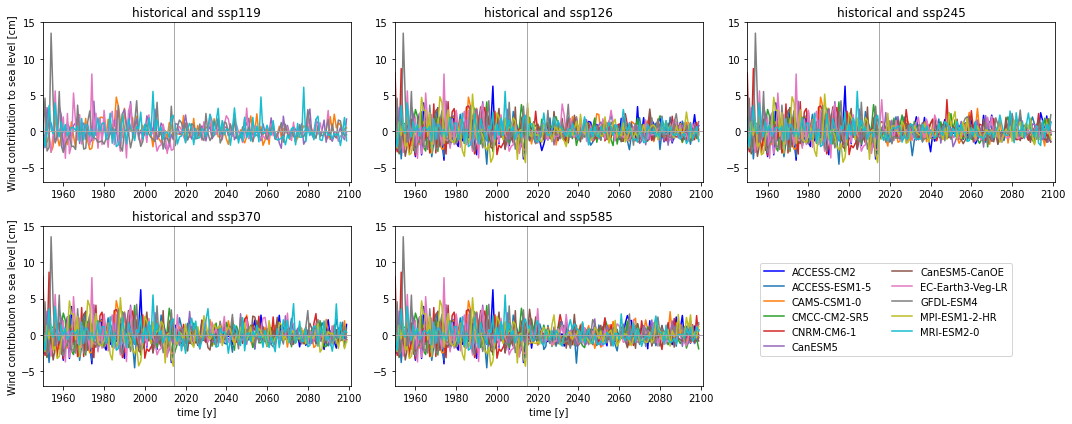

In [79]:
scenarios_np = [proj_119_np, proj_126_np, proj_245_np, proj_370_np, proj_585_np]

fig.plot_projections_per_scenario(scenarios_np, labels, wind_contr_hist_np, hist_start = 1950)

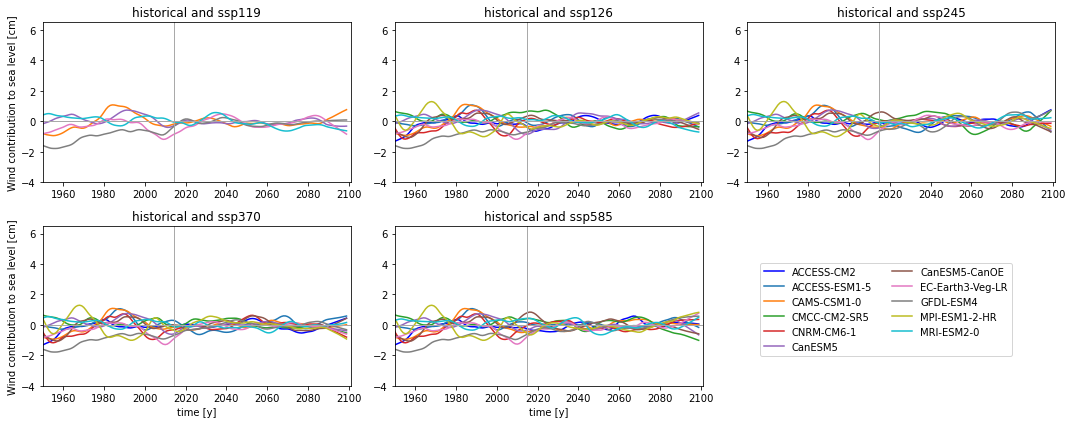

In [80]:
fig.plot_projections_per_scenario(scenarios_np, labels, wind_contr_hist_np, hist_start = 1950, smoothed = True)

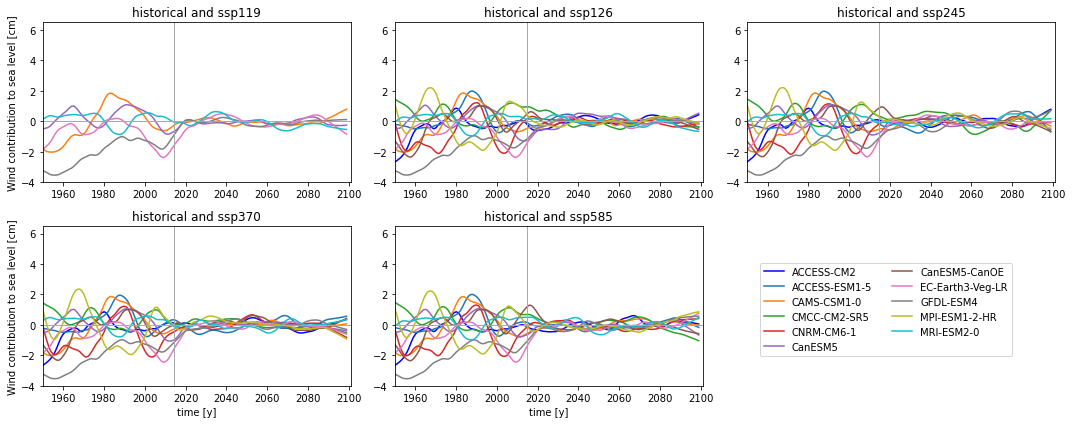

In [81]:
fig.plot_projections_per_scenario(scenarios_np, labels, wind_contr_hist_pp_np, hist_start = 1950, smoothed = True)

There appears to be not much difference between the different scenarios. The issue remains (after using old scales for standardization) that some models have weird shifts: MRI-ESM2-0. Maybe the problem is caused by using the wind contribution from a regression that includes a trend. Does Dangendorf detrend? Maybe I should detrend data.

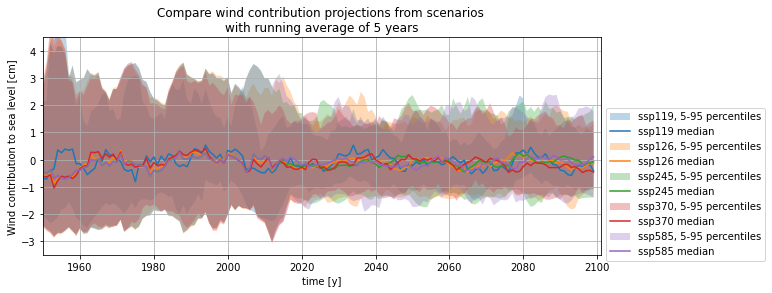

In [82]:
fig.plot_med_percentiles_scenarios(scenarios_np, labels, wind_contr_hist_np, ra=5, hist_start = 1950)

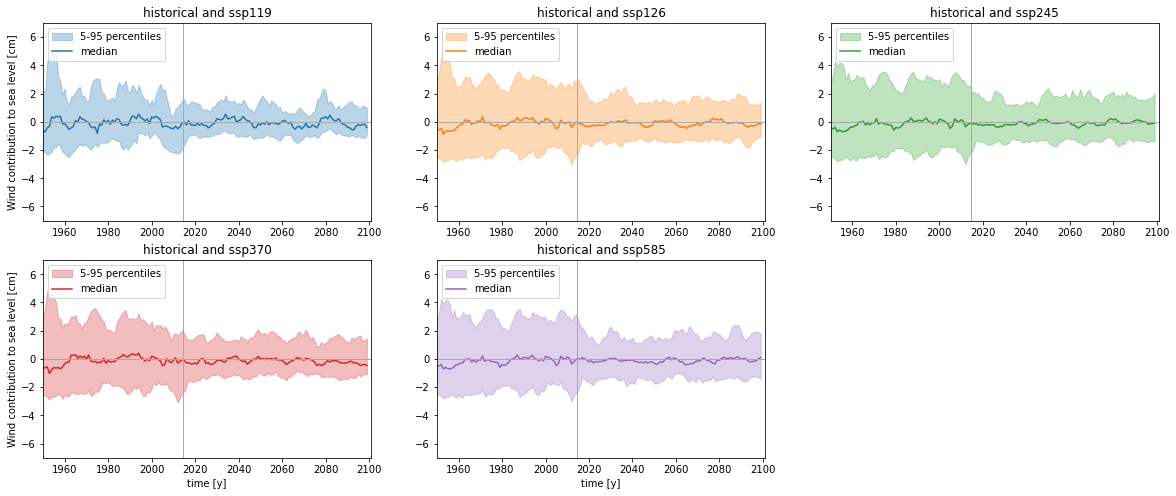

In [83]:
fig.plot_med_percentiles_per_scenarios(scenarios_np, labels, wind_contr_hist_np, ra=5, hist_start = 1950)

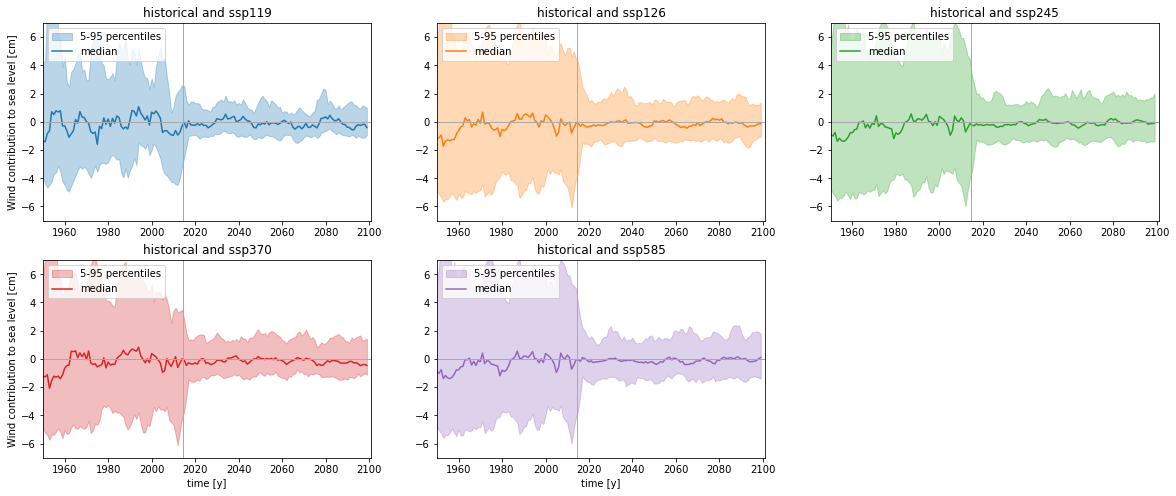

In [84]:
fig.plot_med_percentiles_per_scenarios(scenarios_np, labels, wind_contr_hist_pp_np, ra=5, hist_start = 1950)

## Timmerman wind regression model

MSL       =    

            constant

         + (coef_u2 x u2 + coef_v2 x v2)_channel + (coef_u2 x u2 + coef_v2 x v2)_south

         + (coef_u2 x u2 + coef_v2 x v2)_midwest + (coef_u2 x u2 + coef_v2 x v2)_mideast
         
         + (coef_u2 x u2 + coef_v2 x v2)_northwest + (coef_u2 x u2 + coef_v2 x v2)_northeast



In [85]:
model = 'Timmerman'

#### Import historical wind contribution to sea level rise

In [86]:
# Open data file
wind_contr_hist_tim = imprt.import_cmip6_wind_contribution_data(wind_model = model)

# Select models
wind_contr_hist_tim = wind_contr_hist_tim.where(wind_contr_hist_tim.model.isin(models), drop = True)

# Create dataframe
wind_contr_hist_tim = wind_contr_hist_tim.wind_total.to_pandas().T

# Import historical wind contribution from pre_projection_regression
wind_contr_hist_pp_tim = imprt.import_cmip6_wind_contribution_data_preproj(wind_model='Timmerman')[wind_contr_hist_tim.columns]

#### Import wind data

In [87]:
# Open data file
wind_119 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp119')
wind_126 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp126')
wind_245 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp245')
wind_370 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp370')
wind_585 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp585')
wind_hist = imprt.import_cmip6_wind_data(model = model, data_type = 'historical')


# Select models
wind_119_tim = wind_119.where(wind_119.model.isin(models), drop = True).dropna(dim = 'time')
wind_126_tim = wind_126.where(wind_126.model.isin(models), drop = True).dropna(dim = 'time')
wind_245_tim = wind_245.where(wind_245.model.isin(models), drop = True).dropna(dim = 'time')
wind_370_tim = wind_370.where(wind_370.model.isin(models), drop = True).dropna(dim = 'time')
wind_585_tim = wind_585.where(wind_585.model.isin(models), drop = True).dropna(dim = 'time')
wind_hist_tim = wind_hist.where(wind_hist.model.isin(models), drop = True).dropna(dim = 'time')

#### Plot wind data

The wind is plotted per model as an average over the Timmerman regions

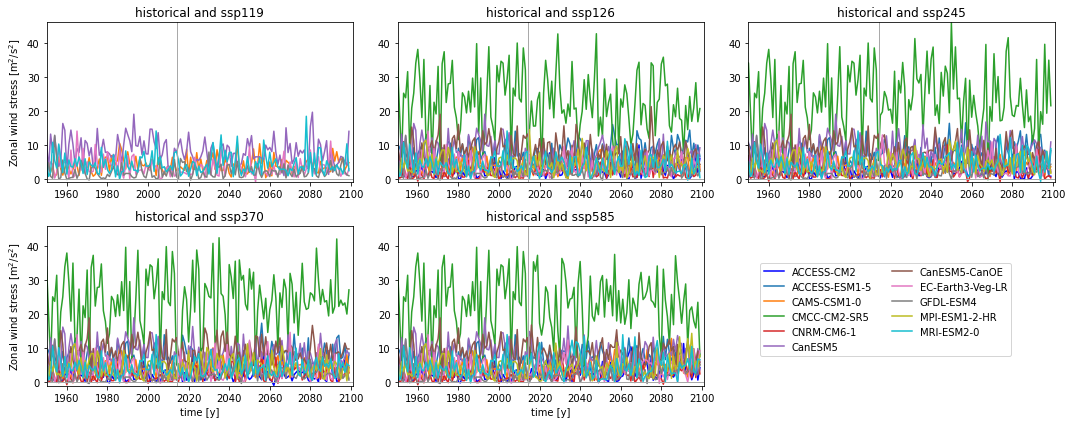

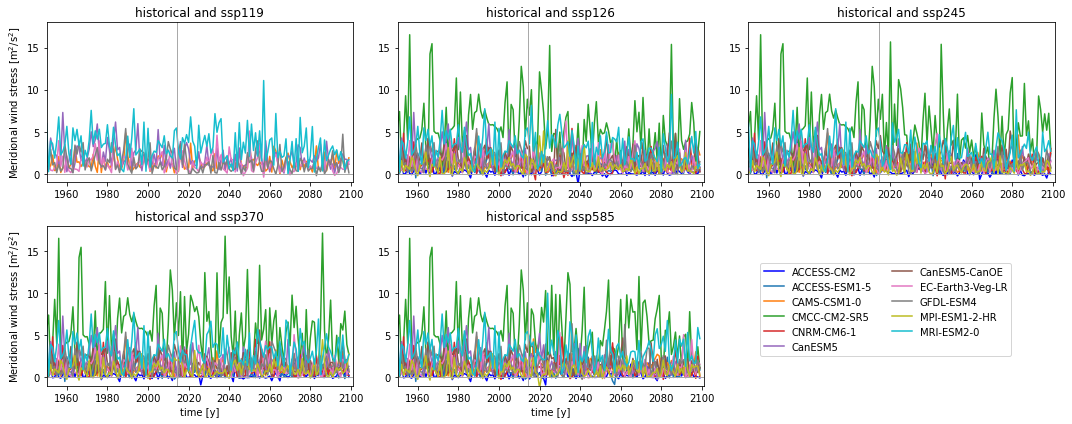

In [88]:
wind_scenarios_tim = [wind_119_tim, wind_126_tim, wind_245_tim, wind_370_tim, wind_585_tim]

fig.plot_wind_per_scenario(wind_scenarios_tim, labels, wind_hist_tim, hist_start = 1950, wind_model = model)

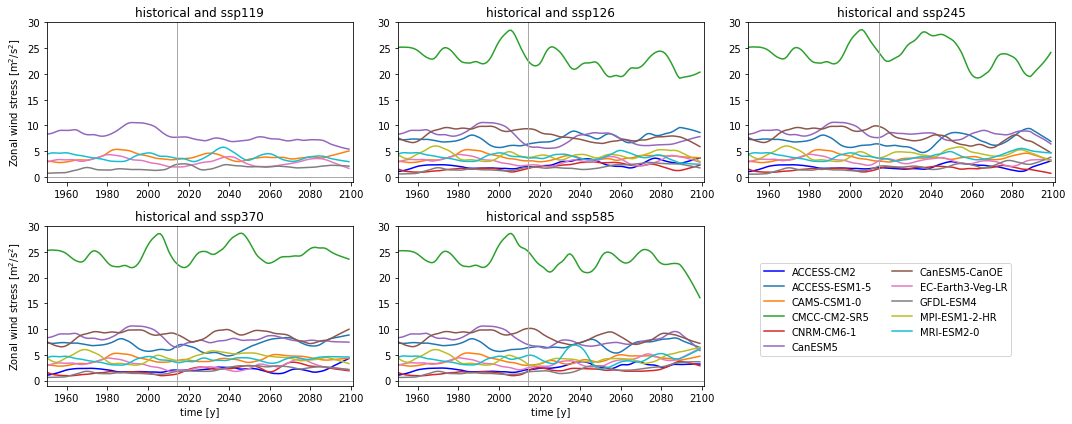

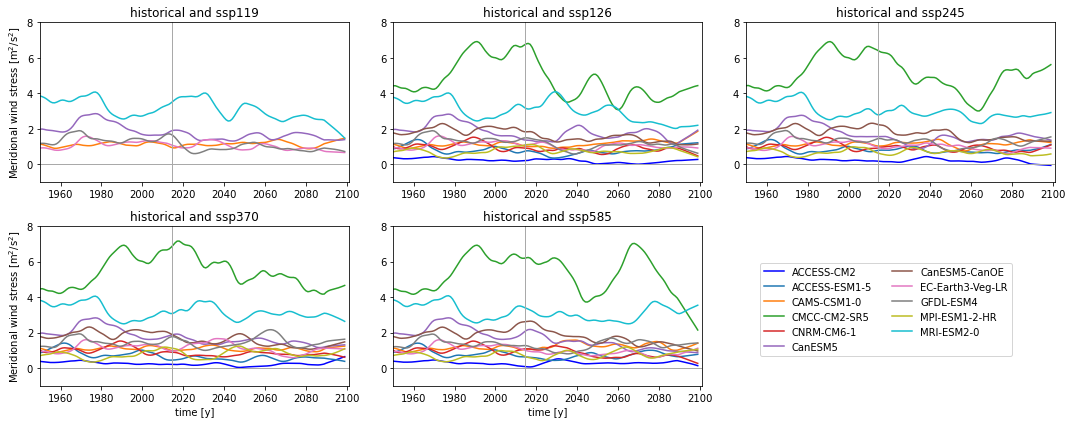

In [89]:
fig.plot_wind_per_scenario(wind_scenarios_tim, labels, wind_hist_tim, hist_start = 1950, smoothed = True, wind_model = model)

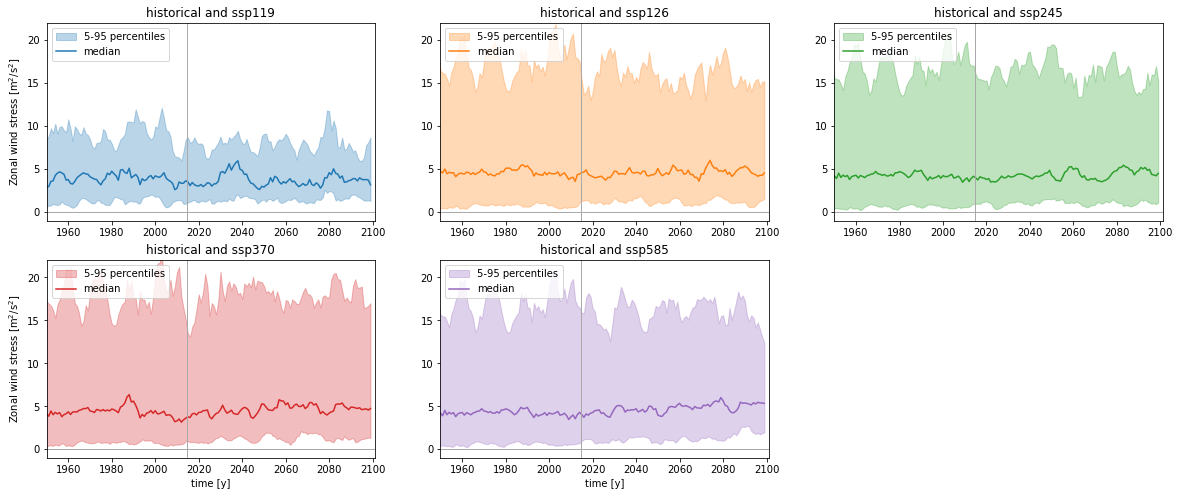

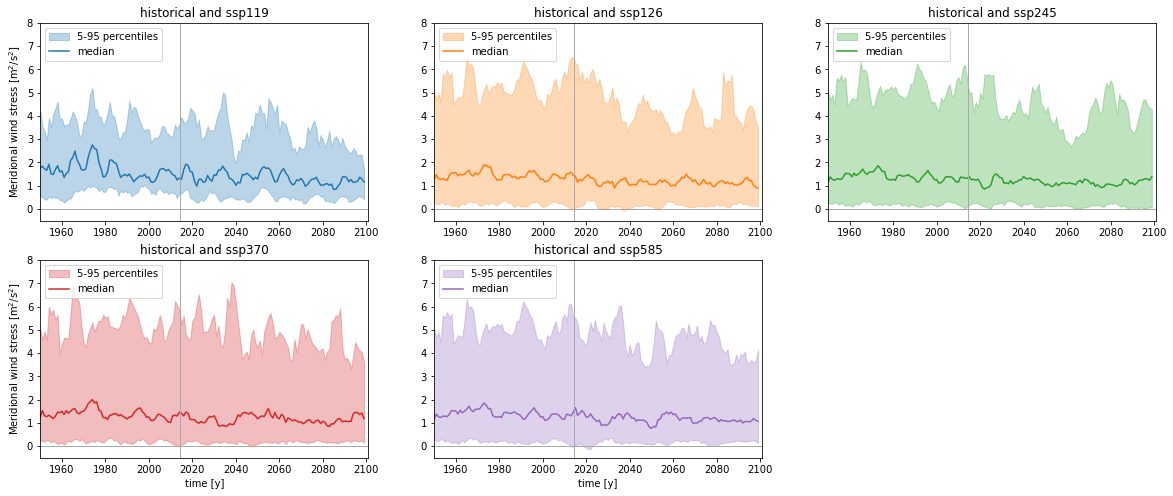

In [90]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_tim, labels, wind_hist_tim, ra=5, hist_start = 1950, wind_model = model)

#### Import regression coefficients

In [91]:
import pandas as pd

# Import regression coefficients
path_reg_results = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Regression results/Projections/'
results_tim = pd.read_csv(path_reg_results + f'{model}_results.csv', index_col = 'result')

# Select models
results_tim = results_tim[models]

In [92]:
results_tim

ACCESS-CM2  ACCESS-ESM1-5   CAMS-CSM1-0  CMCC-CM2-SR5  \
result                                                                      
R$^2$             3.445615e-01   3.249839e-01  1.776150e-01  3.406063e-01   
R$^2_{u^2}$       2.929865e-01   2.901382e-01  1.703011e-01  2.701133e-01   
R$^2_{v^2}$       1.265728e-02   2.265411e-02  0.000000e+00  6.714854e-02   
rmse              3.279787e+00   3.656616e+00  3.745141e+00  2.586432e+00   
constant         -7.561427e-17  -3.158693e-17 -3.165361e-16 -1.440715e-17   
Channel u$^2$    -0.000000e+00  -1.101929e+00 -0.000000e+00  0.000000e+00   
Channel v$^2$     6.487117e-03  -0.000000e+00  2.304495e-01  0.000000e+00   
South u$^2$      -0.000000e+00  -2.920145e-01 -0.000000e+00  0.000000e+00   
South v$^2$       8.612639e-17  -0.000000e+00  0.000000e+00  0.000000e+00   
Mid-West u$^2$   -2.127112e+00  -1.478129e+00  0.000000e+00  0.000000e+00   
Mid-West v$^2$   -9.012538e-01  -1.251811e+00  0.000000e+00  0.000000e+00   
Mid-East u$^2$   -0.000000e+00  -3.937054e-03  0.000000e+00  0.000000e+00   
Mid-East v$^2$   -2.946297e-04  -0.000000e+00  0.000000e+00  0.000000e+00   
North-West u$^2$  4.248387e+00   4.300992e+00  1.455233e+00  1.537488e+00   
North-West v$^2$  0.000000e+00   5.800620e-01  0.000000e+00  6.737780e-01   
North-East u$^2$  1.143782e-02   3.637894e-03  1.722528e-16  0.000000e+00   
North-East v$^2$  0.000000e+00   0.000000e+00  0.000000e+00  2.368476e-16   

                    CNRM-CM6-1       CanESM5  CanESM5-CanOE  EC-Earth3-Veg-LR  \
result                                                                          
R$^2$             6.842172e-01  2.842239e-01   3.715191e-01      5.784205e-01   
R$^2_{u^2}$       3.750227e-01  2.370025e-01   3.084422e-01      4.840749e-01   
R$^2_{v^2}$       3.366631e-01  1.455459e-01   1.781427e-01      1.937722e-01   
rmse              1.732875e+00  2.550887e+00   2.388238e+00      2.034644e+00   
constant         -2.361718e-17  2.427799e-15   6.924726e-16     -5.378098e-16   
Channel u$^2$     0.000000e+00  0.000000e+00  -5.268829e-02      0.000000e+00   
Channel v$^2$     1.855983e+00  5.401315e-01   7.245606e-01      4.703583e-01   
South u$^2$       0.000000e+00  0.000000e+00  -0.000000e+00      0.000000e+00   
South v$^2$       0.000000e+00  4.306320e-17   8.612639e-17      2.414172e-02   
Mid-West u$^2$    0.000000e+00  0.000000e+00   0.000000e+00      1.220047e+00   
Mid-West v$^2$   -2.509388e-01  0.000000e+00  -0.000000e+00      0.000000e+00   
Mid-East u$^2$    0.000000e+00  0.000000e+00   0.000000e+00      6.405650e-15   
Mid-East v$^2$   -0.000000e+00  0.000000e+00  -0.000000e+00      0.000000e+00   
North-West u$^2$  1.744771e+00  1.055406e+00   1.395588e+00      7.073137e-01   
North-West v$^2$ -0.000000e+00 -0.000000e+00   0.000000e+00      4.383839e-01   
North-East u$^2$  1.065814e-14  2.799108e-15   0.000000e+00      0.000000e+00   
North-East v$^2$ -0.000000e+00 -0.000000e+00   0.000000e+00      1.291896e-16   

                      GFDL-CM4     GFDL-ESM4  MPI-ESM1-2-HR    MRI-ESM2-0  \
result                                                                      
R$^2$             5.398335e-01  4.662288e-01   4.458250e-01  3.704757e-01   
R$^2_{u^2}$       4.833794e-01  3.726320e-01   4.251057e-01  2.480686e-01   
R$^2_{v^2}$       0.000000e+00  2.023307e-02   0.000000e+00  1.621764e-01   
rmse              1.786042e+00  2.416306e+00   2.650862e+00  2.066091e+00   
constant         -1.585831e-16  6.539459e-16  -2.719516e-16  1.700904e-15   
Channel u$^2$    -2.174657e-01 -0.000000e+00  -6.923766e-01 -0.000000e+00   
Channel v$^2$    -0.000000e+00  1.281140e+00   0.000000e+00  1.094023e+00   
South u$^2$      -9.689219e-17 -2.157014e-01  -1.076580e-17 -0.000000e+00   
South v$^2$      -0.000000e+00  1.018633e-01   0.000000e+00  6.642498e-15   
Mid-West u$^2$    0.000000e+00  0.000000e+00  -0.000000e+00  0.000000e+00   
Mid-West v$^2$   -3.827232e-01 -1.108810e+00  -9.675359e-02 -0.000000e+00   
Mid-East u$^2$ 

In [93]:
proj_119_tim = proj.wind_contr_proj(results_tim, wind_119_tim, wm = model)
proj_126_tim = proj.wind_contr_proj(results_tim, wind_126_tim, wm = model)
proj_245_tim = proj.wind_contr_proj(results_tim, wind_245_tim, wm = model)
proj_370_tim = proj.wind_contr_proj(results_tim, wind_370_tim, wm = model)
proj_585_tim = proj.wind_contr_proj(results_tim, wind_585_tim, wm = model)

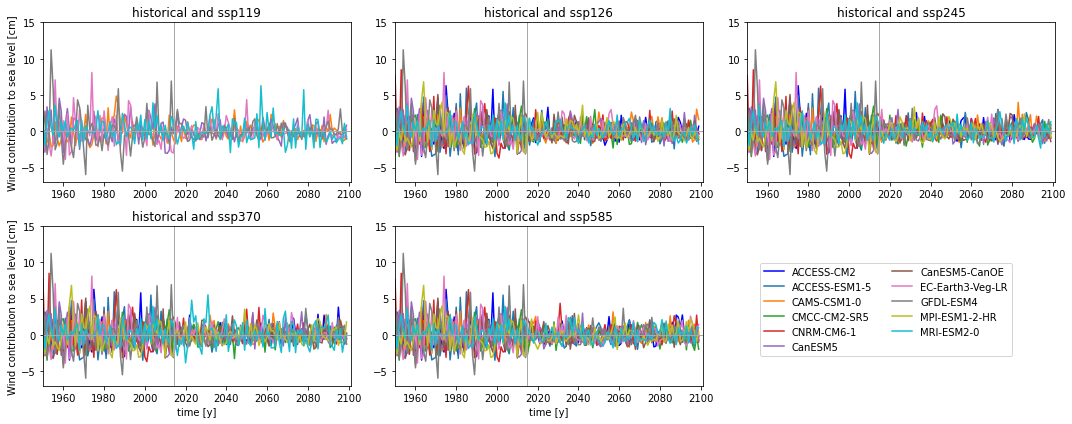

In [94]:
scenarios_tim = [proj_119_tim, proj_126_tim, proj_245_tim, proj_370_tim, proj_585_tim]
labels = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

fig.plot_projections_per_scenario(scenarios_tim, labels, wind_contr_hist_tim, hist_start = 1950, wind_model = model)

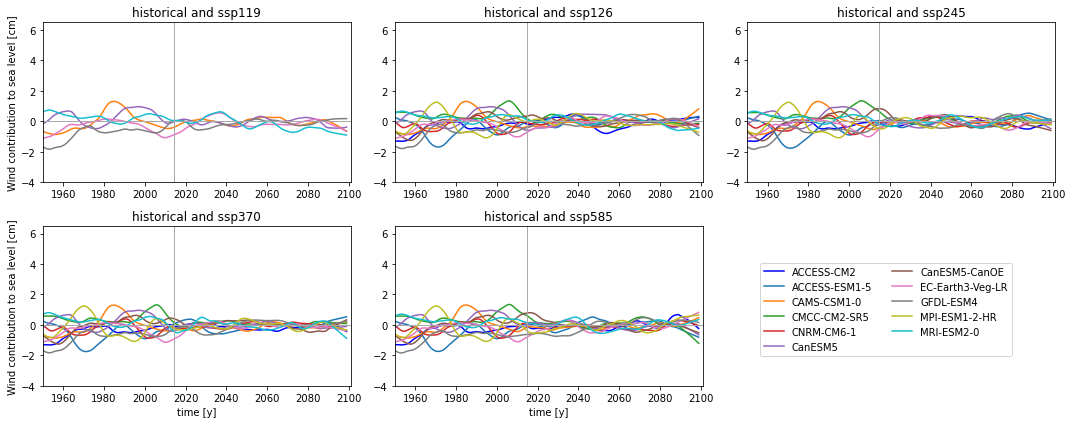

In [95]:
fig.plot_projections_per_scenario(scenarios_tim, labels, wind_contr_hist_tim, hist_start = 1950, smoothed = True, wind_model = model)

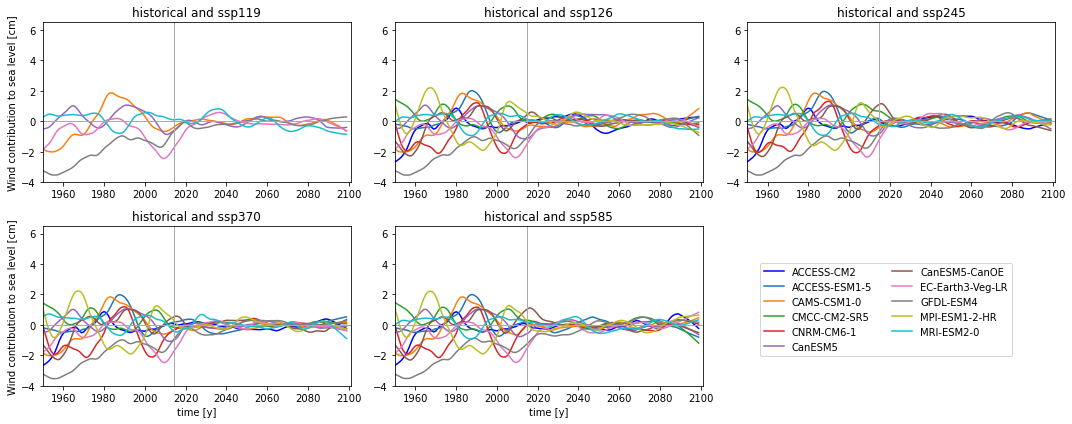

In [96]:
fig.plot_projections_per_scenario(scenarios_tim, labels, wind_contr_hist_pp_tim, hist_start = 1950, smoothed = True, wind_model = model)

Especially the non-smoothed projections are very different from the NearestPoint wind model

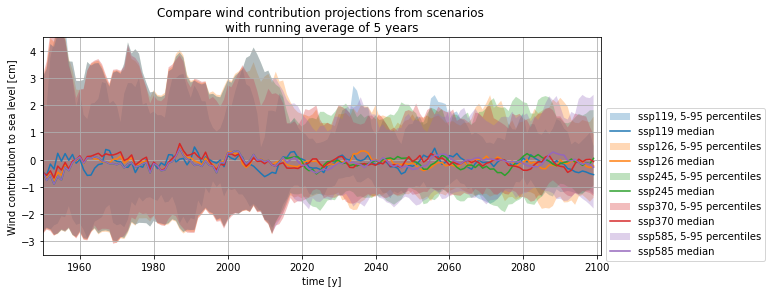

In [97]:
fig.plot_med_percentiles_scenarios(scenarios_tim, labels, wind_contr_hist_tim, hist_start = 1950, wind_model = model)

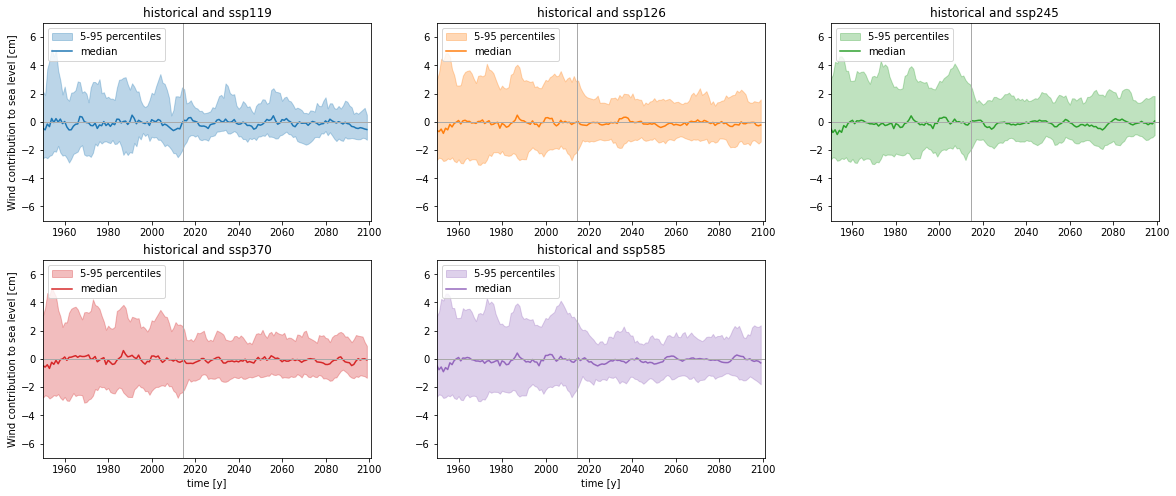

In [98]:
fig.plot_med_percentiles_per_scenarios(scenarios_tim, labels, wind_contr_hist_tim, hist_start = 1950, ra=5, wind_model = model)

## Dangendorf wind regression model

MSL = constant + coef_neg x negative corr. region + coef_pos x positive corr. region



In [99]:
model = 'Dangendorf'

#### Import historical wind contribution to sea level rise

In [100]:
# Open data file
wind_contr_hist_da = imprt.import_cmip6_wind_contribution_data(wind_model = model)

# Select models
wind_contr_hist_da = wind_contr_hist_da.where(wind_contr_hist_da.model.isin(models), drop = True)

# Create dataframe
wind_contr_hist_da = wind_contr_hist_da.wind_total.to_pandas().T

# Import historical wind contribution from pre_projection_regression
wind_contr_hist_pp_da = imprt.import_cmip6_wind_contribution_data_preproj(wind_model = model)[wind_contr_hist_da.columns]

#### Import pressure data

In [101]:
# Open data file
wind_119 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp119')
wind_126 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp126')
wind_245 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp245')
wind_370 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp370')
wind_585 = imprt.import_cmip6_wind_data(model = model, data_type = 'ssp585')
wind_hist = imprt.import_cmip6_wind_data(model = model, data_type = 'historical')

# Select models
wind_119_da = wind_119.where(wind_119.model.isin(models), drop = True).dropna(dim = 'time')
wind_126_da = wind_126.where(wind_126.model.isin(models), drop = True).dropna(dim = 'time')
wind_245_da = wind_245.where(wind_245.model.isin(models), drop = True).dropna(dim = 'time')
wind_370_da = wind_370.where(wind_370.model.isin(models), drop = True).dropna(dim = 'time')
wind_585_da = wind_585.where(wind_585.model.isin(models), drop = True).dropna(dim = 'time')
wind_hist_da = wind_hist.where(wind_hist.model.isin(models), drop = True)

#### Plot pressure data

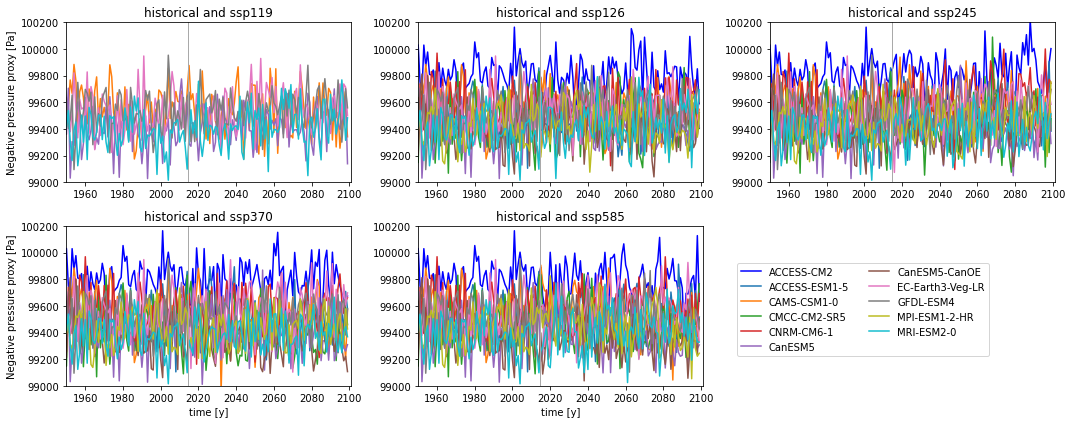

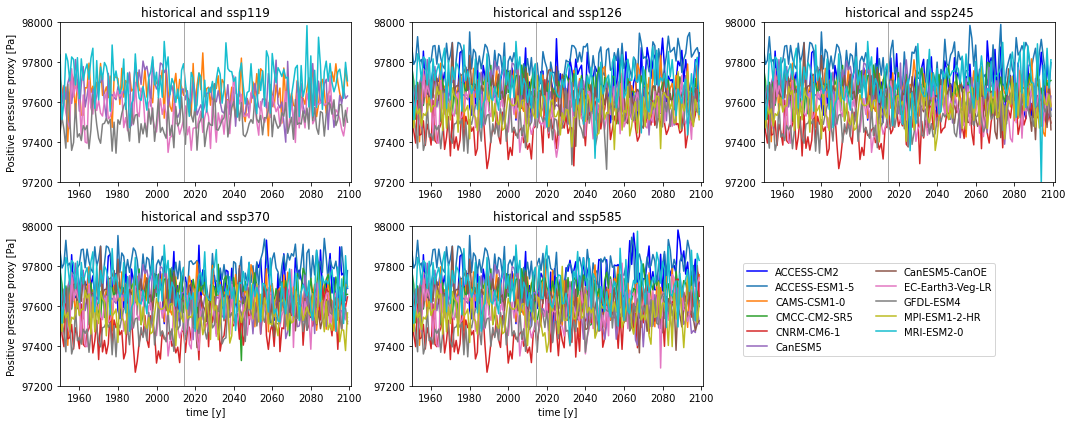

In [102]:
wind_scenarios_da = [wind_119_da, wind_126_da, wind_245_da, wind_370_da, wind_585_da]

fig.plot_wind_per_scenario(wind_scenarios_da, labels, wind_hist_da, hist_start = 1950, wind_model = model)

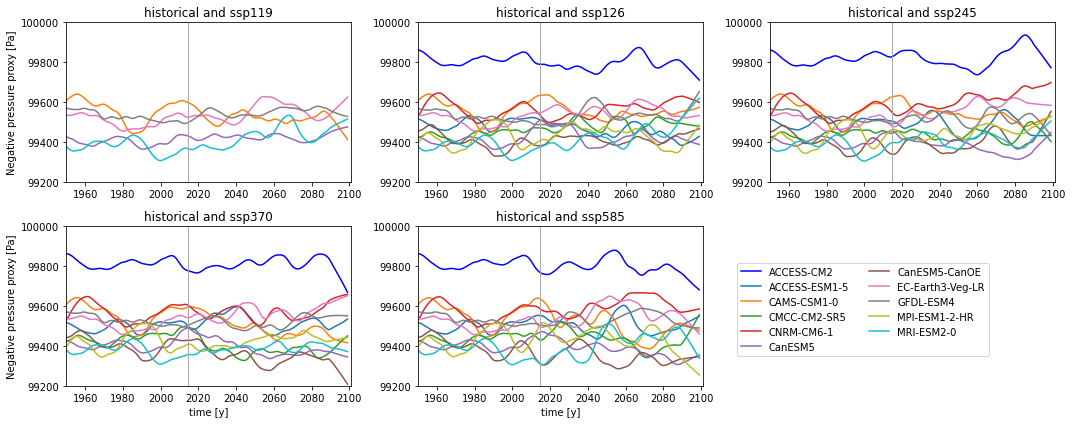

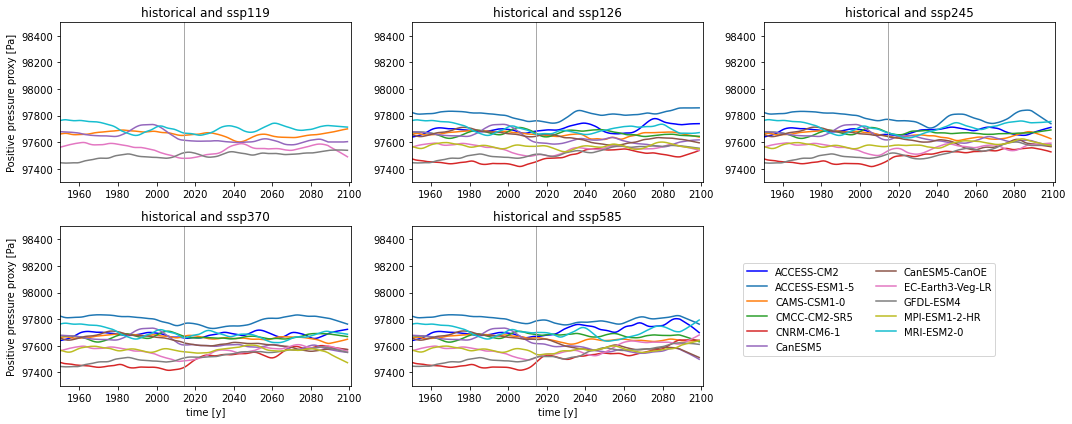

In [103]:
fig.plot_wind_per_scenario(wind_scenarios_da, labels, wind_hist_da, hist_start = 1950, smoothed = True, wind_model = model)

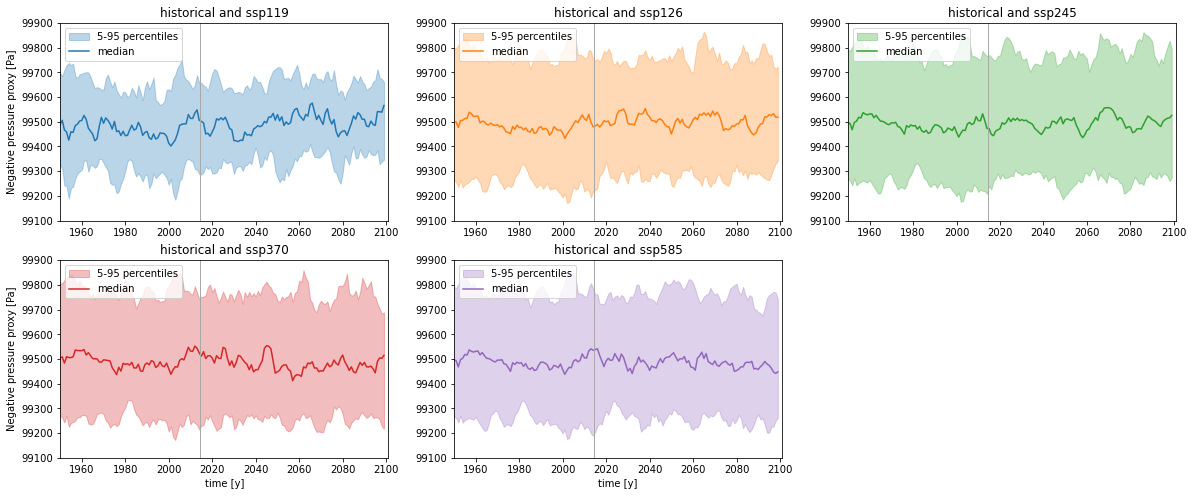

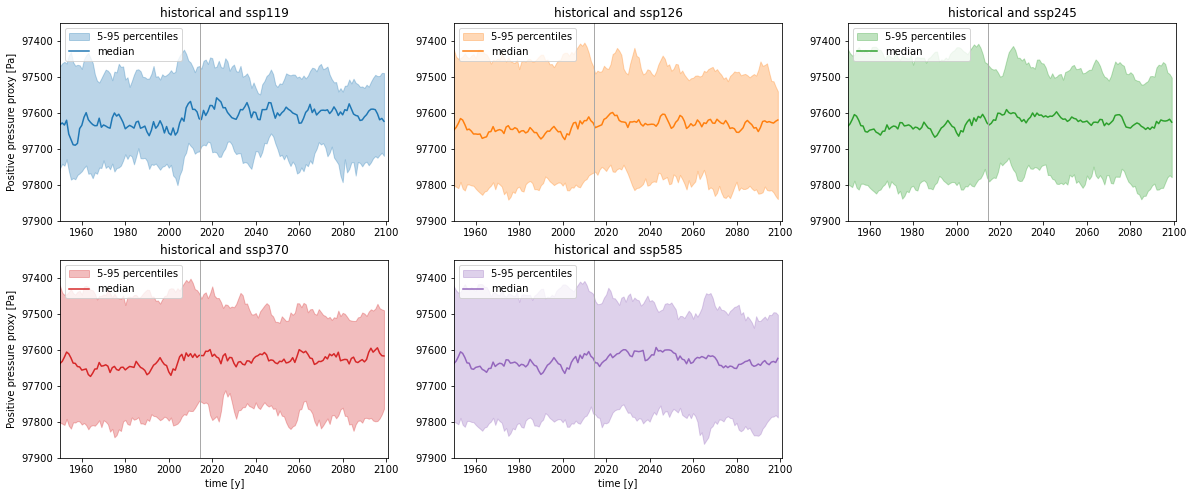

In [104]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_da, labels, wind_hist_da, ra=5, hist_start = 1950, wind_model = model)

#### Import regression coefficients

In [105]:
import pandas as pd

# Import regression coefficients
path_reg_results = '/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Data/cmip6/Regression results/Projections/'
results_da = pd.read_csv(path_reg_results + f'{model}_results.csv', index_col = 'result')

# Select models
results_da = results_da[models]

In [106]:
results_da

ACCESS-CM2  ACCESS-ESM1-5   CAMS-CSM1-0  CMCC-CM2-SR5  \
result                                                                          
R$^2$                 1.909585e-01   7.443421e-02  1.864894e-01  4.214288e-01   
R$^2_{neg}$           1.182659e-01   1.910172e-02  1.245788e-01  3.614275e-01   
R$^2_{pos}$           1.679866e-01   7.025201e-02  1.574428e-01  2.069308e-01   
rmse                  3.643889e+00   4.281796e+00  3.724880e+00  2.422741e+00   
constant             -1.719476e-17  -2.555058e-17 -3.290508e-16  6.562986e-17   
Negative corr region -7.236741e-01  -2.998334e-01 -8.298954e-01 -1.614851e+00   
Positive corr region  1.277330e+00   1.092908e+00  1.196068e+00  7.866715e-01   

                        CNRM-CM6-1       CanESM5  CanESM5-CanOE  \
result                                                            
R$^2$                 5.756855e-01  2.996565e-01   3.435049e-01   
R$^2_{neg}$           4.004889e-01  2.349575e-01   3.017689e-01   
R$^2_{pos}$           4.860879e-01  2.106224e-01   1.693186e-01   
rmse                  2.008709e+00  2.523238e+00   2.440885e+00   
constant             -4.895172e-17  2.384909e-15   6.500344e-16   
Negative corr region -1.093931e+00 -1.072918e+00  -1.395273e+00   
Positive corr region  1.549338e+00  7.846922e-01   6.315190e-01   

                      EC-Earth3-Veg-LR      GFDL-CM4     GFDL-ESM4  \
result                                                               
R$^2$                     4.462435e-01  3.080366e-01  3.364589e-01   
R$^2_{neg}$               3.872483e-01  2.379767e-01  1.037873e-01   
R$^2_{pos}$               2.145995e-01  2.364970e-01  3.275887e-01   
rmse                      2.331890e+00  2.190159e+00  2.694066e+00   
constant                 -5.099527e-16 -1.711408e-16  5.689597e-16   
Negative corr region     -1.612550e+00 -8.182269e-01 -2.117223e-01   
Positive corr region      8.203911e-01  8.367958e-01  1.809369e+00   

                      MPI-ESM1-2-HR    MRI-ESM2-0         NESM3       NorCPM1  
result                                                                         
R$^2$                  3.328864e-01  2.586283e-01  3.769901e-01  5.199522e-01  
R$^2_{neg}$            1.548543e-01  2.130368e-01  2.506386e-01  3.013824e-01  
R$^2_{pos}$            3.150781e-01  1.507887e-01  2.695270e-01  4.208977e-01  
rmse                   2.908462e+00  2.242132e+00  2.654967e+00  1.421455e+00  
constant              -1.921558e-16  1.663697e-15  5.505355e-16  8.645424e-18  
Negative corr region  -5.494223e-01 -9.445768e-01 -1.214086e+00 -5.983360e-01  
Positive corr region   1.720385e+00  5.876761e-01  1.234589e+00  1.094741e+00

In [107]:
proj_119_da = proj.wind_contr_proj(results_da, wind_119_da, wm = model)
proj_126_da = proj.wind_contr_proj(results_da, wind_126_da, wm = model)
proj_245_da = proj.wind_contr_proj(results_da, wind_245_da, wm = model)
proj_370_da = proj.wind_contr_proj(results_da, wind_370_da, wm = model)
proj_585_da = proj.wind_contr_proj(results_da, wind_585_da, wm = model)

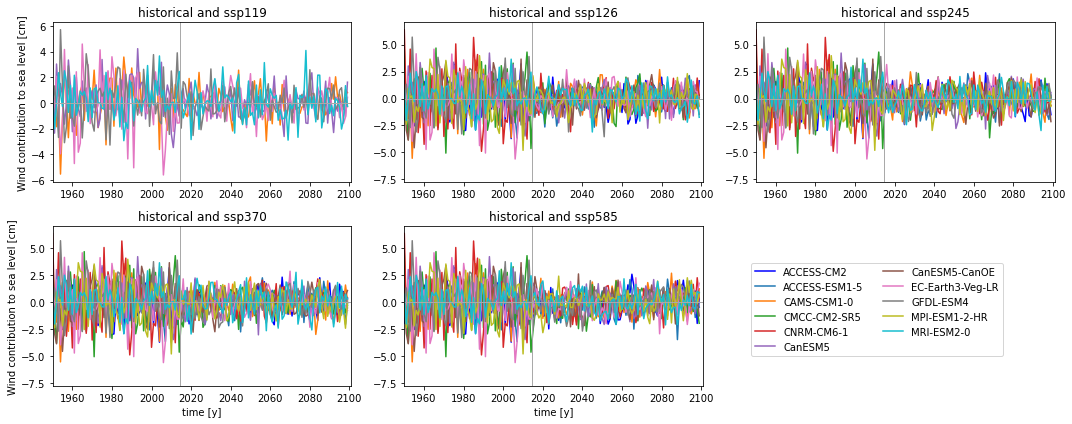

In [108]:
scenarios_da = [proj_119_da, proj_126_da, proj_245_da, proj_370_da, proj_585_da]

fig.plot_projections_per_scenario(scenarios_da, labels, wind_contr_hist_da, hist_start = 1950, wind_model = model)

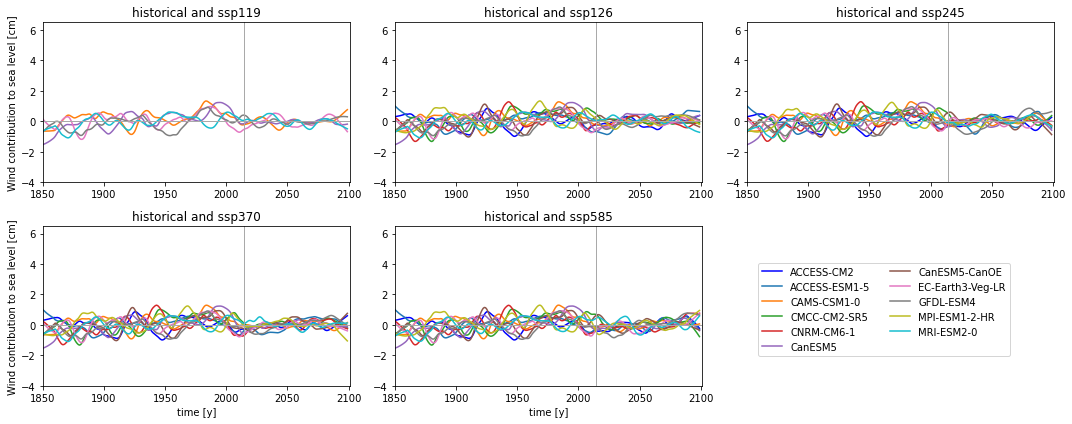

In [122]:
fig.plot_projections_per_scenario(scenarios_da, labels, wind_contr_hist_da, hist_start = 1850, smoothed = True, wind_model = model)

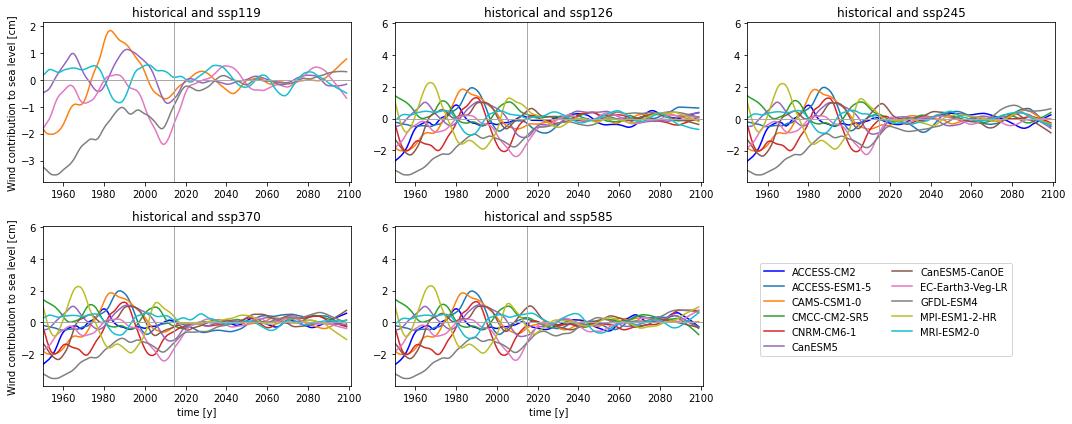

In [110]:
fig.plot_projections_per_scenario(scenarios_da, labels, wind_contr_hist_pp_da, hist_start = 1950, smoothed = True, wind_model = model)

Especially the non-smoothed projections are very different from the NearestPoint wind model

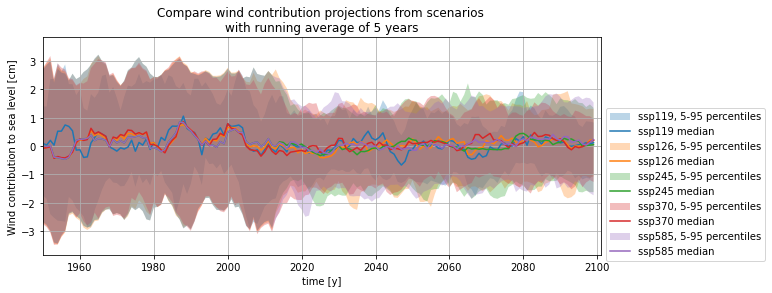

In [111]:
fig.plot_med_percentiles_scenarios(scenarios_da, labels, wind_contr_hist_da, hist_start = 1950, wind_model = model)

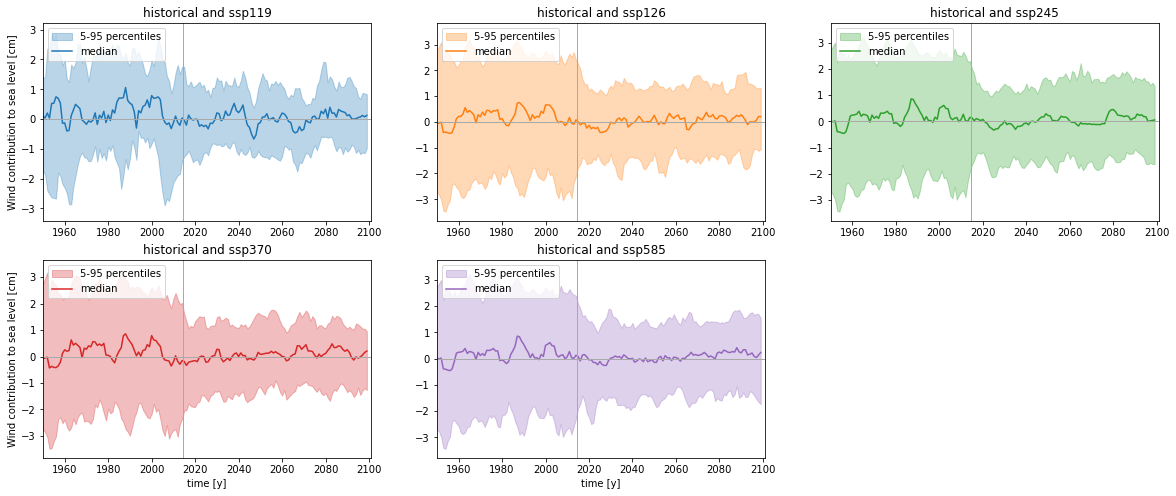

In [112]:
fig.plot_med_percentiles_per_scenarios(scenarios_da, labels, wind_contr_hist_da, hist_start = 1950, ra=5, wind_model = model)

## Compare the different wind models

#### Historical and projected wind contribution to mean sea level

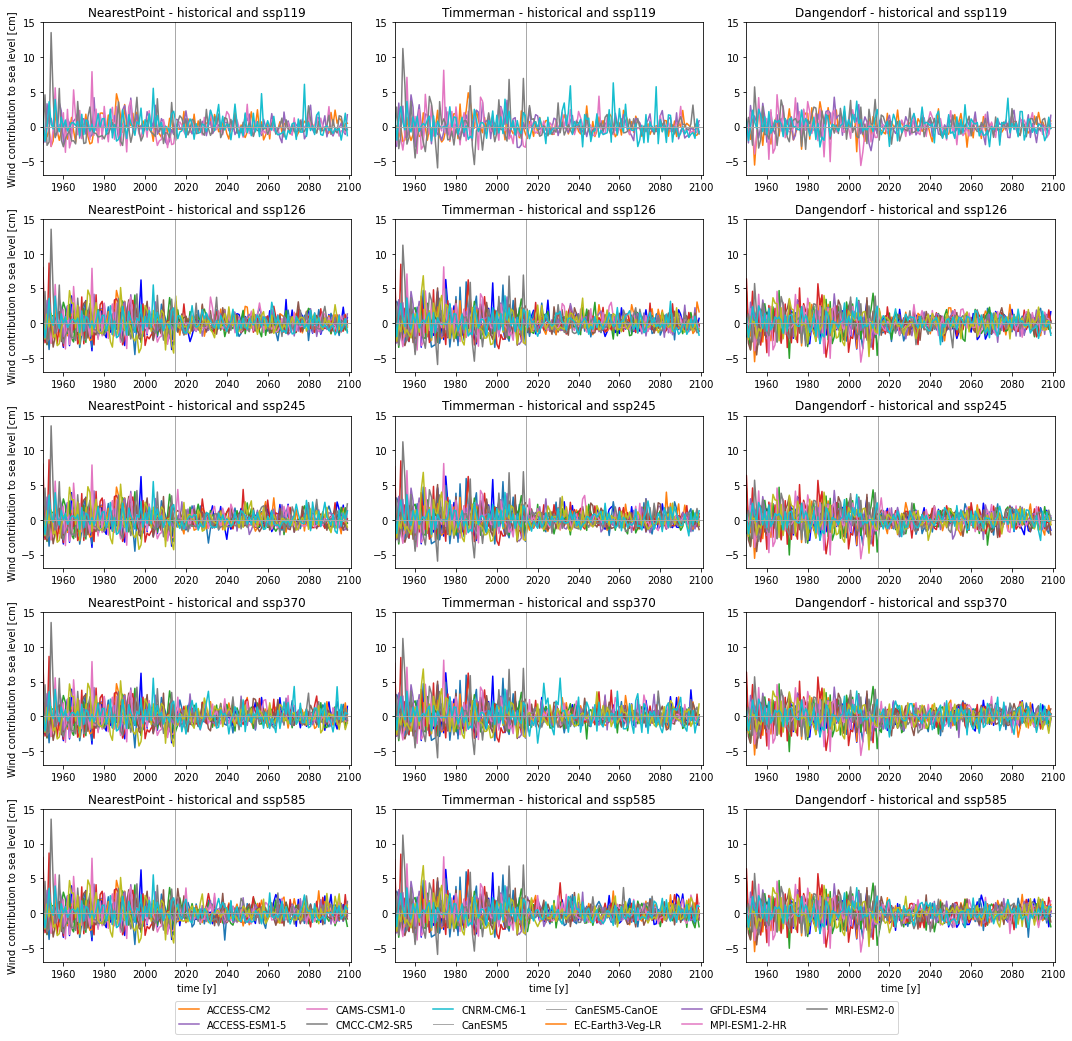

In [113]:
scenarios_comp = [scenarios_np, scenarios_tim, scenarios_da]
wind_contr_hist = [wind_contr_hist_np, wind_contr_hist_tim, wind_contr_hist_da]

fig.plot_projections_per_scenario_all_wind_models(scenarios_comp, labels, wind_contr_hist, hist_start = 1950)

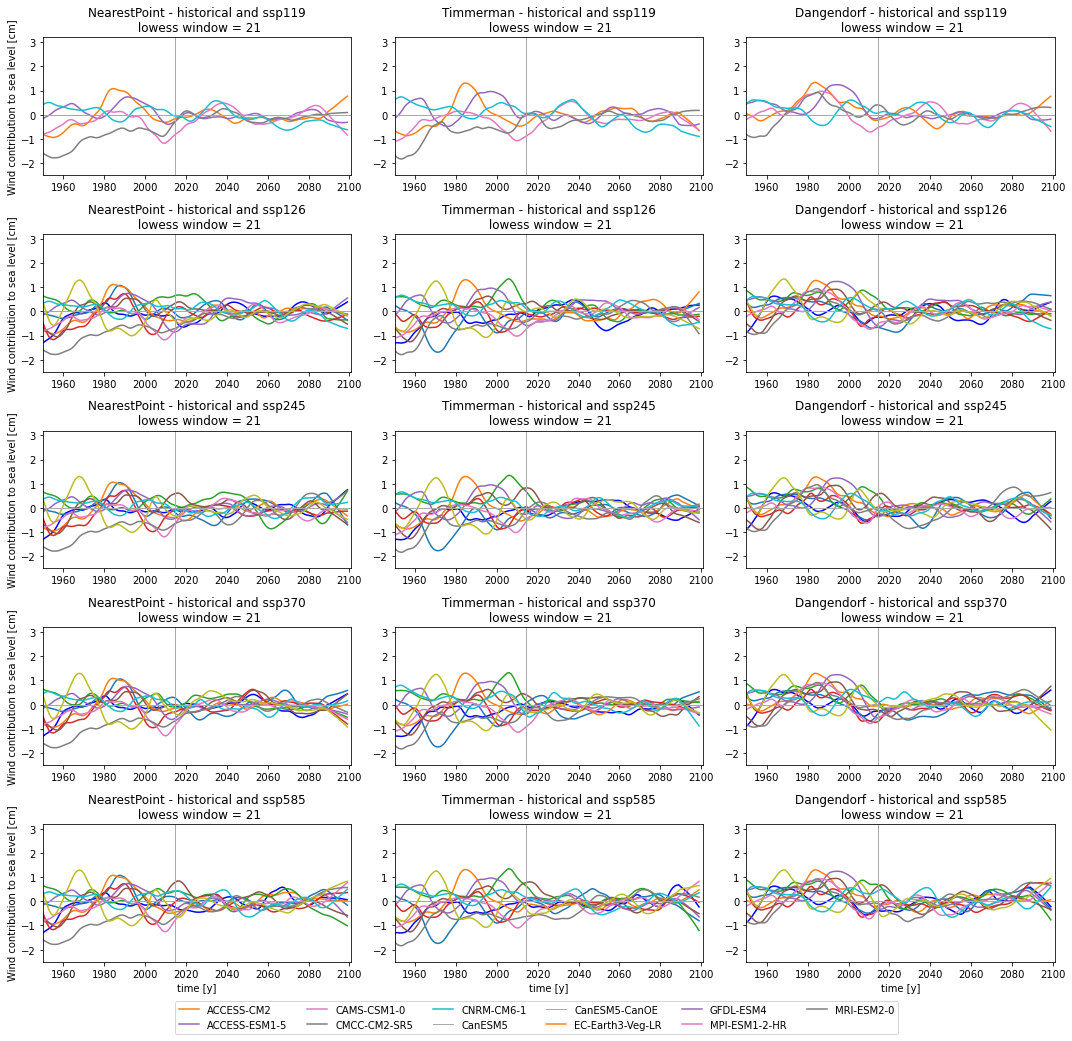

In [114]:
fig.plot_projections_per_scenario_all_wind_models(scenarios_comp, labels, wind_contr_hist, hist_start = 1950, smoothed = True)

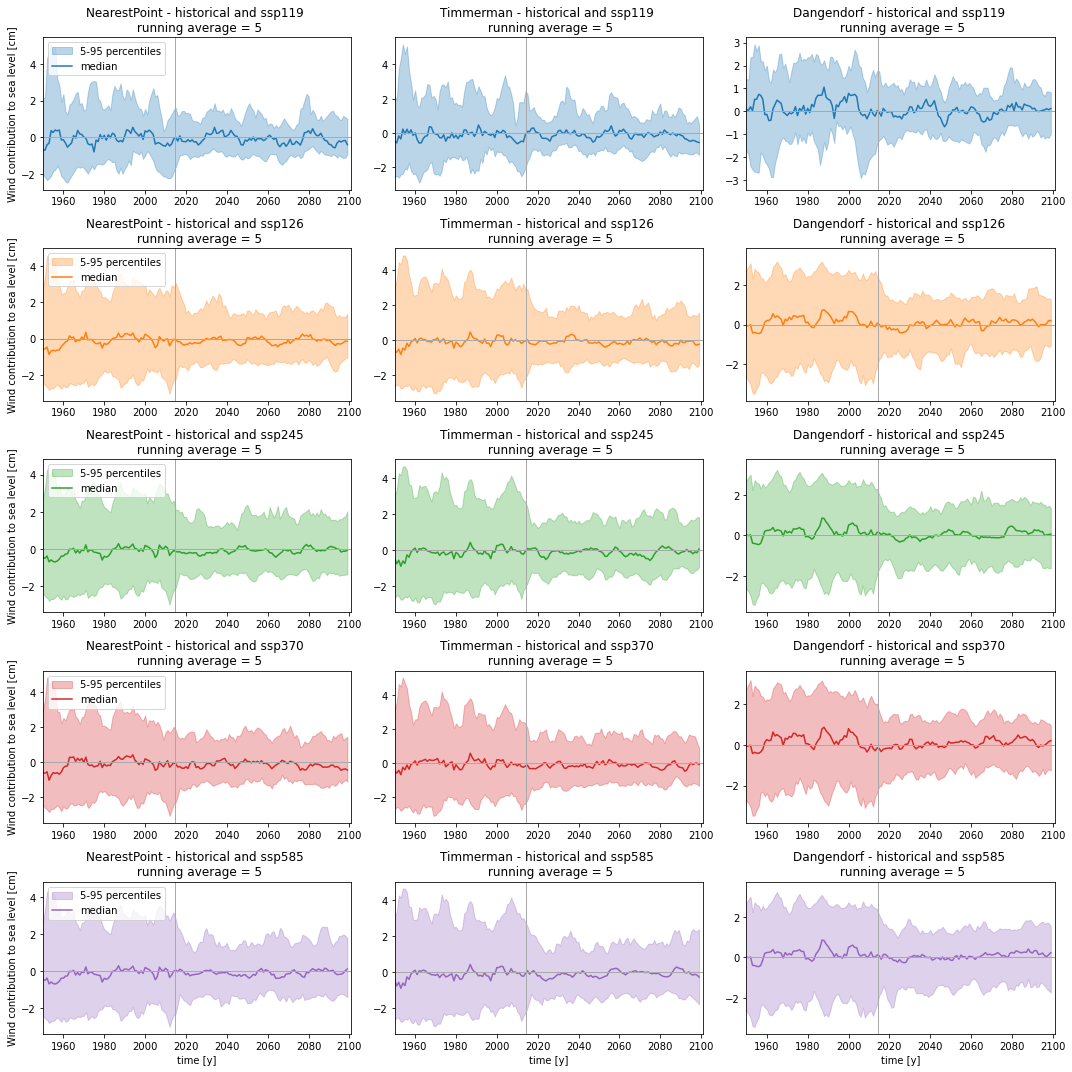

In [115]:
fig.plot_med_percentiles_per_scenarios_all_wind_models(scenarios_comp, labels, wind_contr_hist, hist_start = 1950, ra=5)

### Annual trends over 2001 - 2100

Dangendorf found trends between -0.14 and 0.60 mm/y

Text(0, 0.5, 'Linear trend [mm/y]')

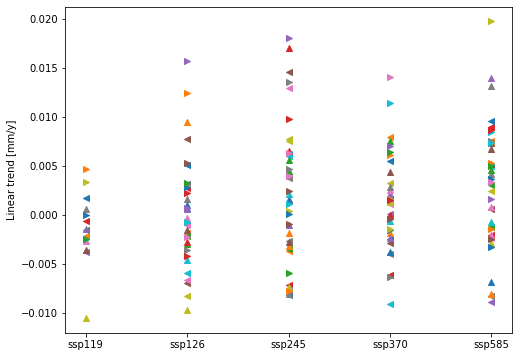

In [116]:
import matplotlib.pyplot as plt

from scipy.stats import linregress

wind_labels = ['NearestPoint', 'Timmerman', 'Dangendorf']
markers = ['<', '^', '>']


plt.figure(figsize=(8,6))

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se']})
        df = df.set_index('variable')
        for k, model in enumerate(scenario.columns): # loop over the models
            trend = linregress(scenario.index.values, scenario[model].values).slope
            se = linregress(scenario.index.values, scenario[model].values).stderr
            df[model] = [trend, se]
            
            plt.scatter(labels[j], trend, marker = markers[i])
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = labels))
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)

plt.ylabel('Linear trend [mm/y]')



In [117]:
models = scenarios_comp[0][2].columns

In [118]:
models

Index(['ACCESS-CM2', 'ACCESS-ESM1-5', 'CAMS-CSM1-0', 'CMCC-CM2-SR5',
       'CNRM-CM6-1', 'CanESM5', 'CanESM5-CanOE', 'EC-Earth3-Veg-LR',
       'GFDL-CM4', 'GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NESM3'],
      dtype='object')

In [119]:
def significance_test(p, alpha):
    if p < alpha: return True
    else: return False

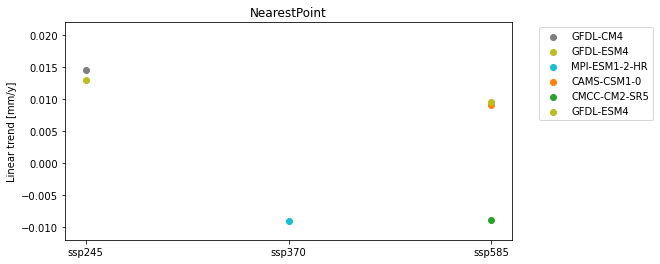

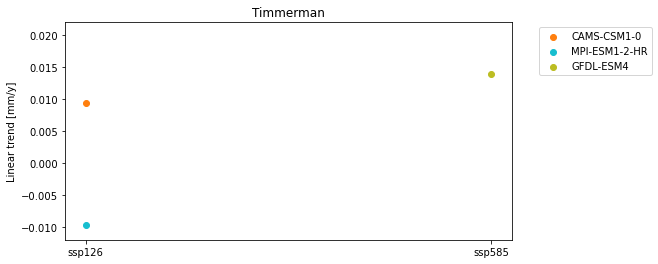

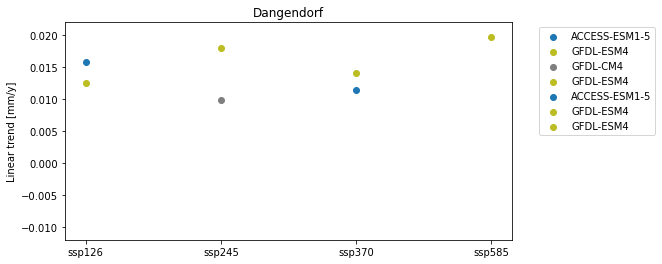

In [121]:
colors = ['b', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'g', 'k']
models = scenarios_comp[0][2].columns
significance_level = 95

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    
    plt.figure(figsize=(8,4))
    plt.title(wind_labels[i])
    plt.ylabel('Linear trend [mm/y]')
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se', 'sig']})
        df = df.set_index('variable')
        for k, model in enumerate(models): # loop over the models
            if model in scenario:
                trend = linregress(scenario.index.values, scenario[model].values).slope
                se = linregress(scenario.index.values, scenario[model].values).stderr
                p = linregress(scenario.index.values, scenario[model].values).pvalue
                sig = significance_test(p, 1-significance_level/100)
                df[model] = [trend, se, sig]
                #plt.errorbar(labels[j], trend, yerr=se, fmt="o", label = 'Tide gauge')
                if sig:
                    plt.scatter(labels[j], trend, color = colors[k], label = model)
                
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = labels))
    plt.ylim(-0.012, 0.022)
    plt.legend(bbox_to_anchor=(1.05, 1.0))
    
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)



Most annual trends are not significant on the 95% significance level and the significant ones are very very small.